## Churn Prediction Model - UNEC ICT Club

### 1. Data Preparation and Loading

In this cell we load the Telco Customer Churn dataset, perform an initial inspection, identify and treat missing values, remove duplicates, and perform a basic outlier check for numeric features.

The purpose is to get a clean dataset prior to EDA + model building.


Data Preparation

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

Loading the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Initial Inspection

(meaning: **first overview** using `df.head()`, ``df.info()`` and ``df.describe()``)

In [3]:
print("Shape is:", df.shape)

display(df.head()); display(df.info()); display(df.describe(include='all').T)

Shape is: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Standardization of possible column issues using trimming whitespace in obj. columns

In [4]:
obj_cols = df.select_dtypes("object").columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.str.strip())

Just in case, I am going to convert the `TotalCharges` into numeric. Because it can probably be needed.

Also I'll print missing values + remove all duplicates if there are any.

In [5]:
# Totalcharges to numberic
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Missing values
print("\nMissing values per column:")
display(df.isna().sum())

# Remove duplicates
dups = df.duplicated().sum()
print(f"\nDuplicates found: {dups}")
if dups > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed.")


Missing values per column:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Duplicates found: 0


Luckily, we do not have any duplicate. Our dataset is currently fine.

#### Outlier checking using IQR (InterQuartile Range)

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", num_cols)

def detect_outliers_iqr(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

for c in num_cols:
    n_out = detect_outliers_iqr(df[c].dropna())
    print(f"Column {c} has {n_out} outliers.")

# we will keep dataframe for next steps
df.shape


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Column SeniorCitizen has 1142 outliers.
Column tenure has 0 outliers.
Column MonthlyCharges has 0 outliers.
Column TotalCharges has 0 outliers.


(7043, 21)

## 2. Exploratory Data Analysis (EDA)

We will analyse the distribution of the target variable (`Churn`) and then examine categorical and numerical variables visually. This step helps to discover relationships, class imbalance, and suspicious patterns that require special handling.

Planned visual checks:
- Target balance (value counts)
- Countplots for important categorical features
- Histograms and boxplots for numeric features
- Distribution of features split by target
- Correlation heatmap for numeric variables


Viewing the balance in the target column - `Churn`

In [9]:
if "Churn" in df.columns:
    print("Churn counts:")
    display(df["Churn"].value_counts())
    display(df["Churn"].value_counts(normalize=True).mul(100).round(2))

Churn counts:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

Churn Distribution

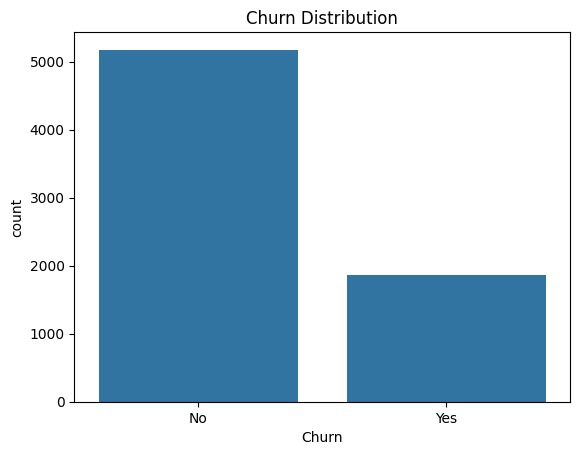

In [10]:
plt.figure()
sns.countplot(data=df, x="Churn", order=df["Churn"].value_counts().index)
plt.title("Churn Distribution")
plt.show()

Categorical Features 

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Also: remove ID and target from list if present
cat_cols = [c for c in cat_cols if c not in ("customerID", "Churn")]

Categorical Countplots

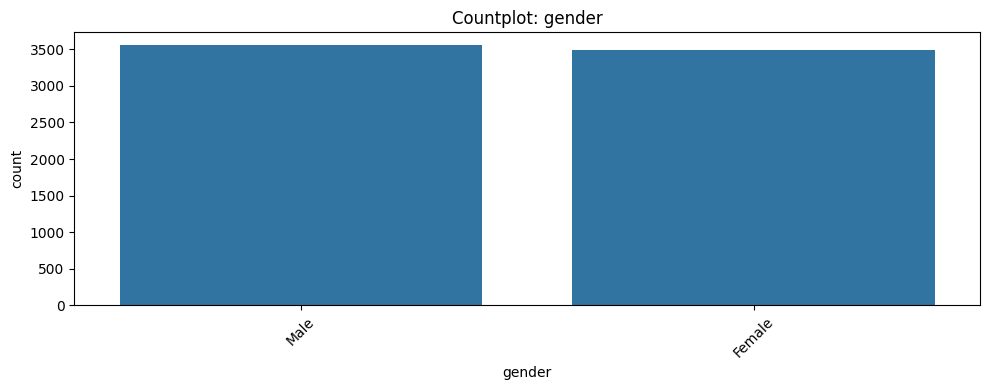

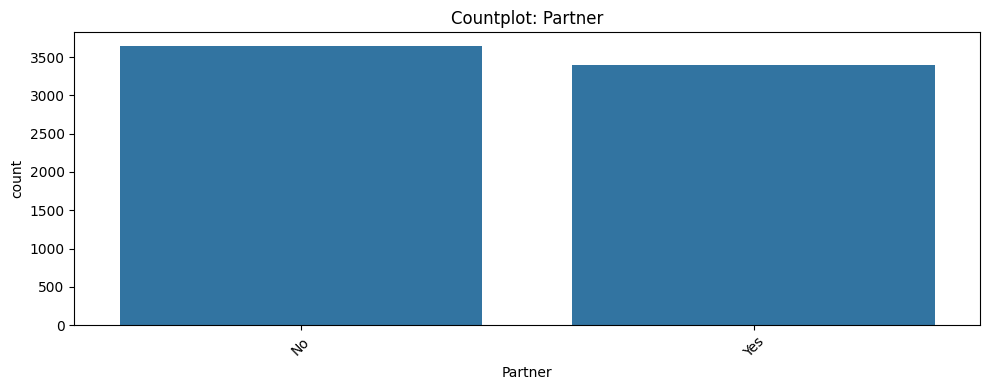

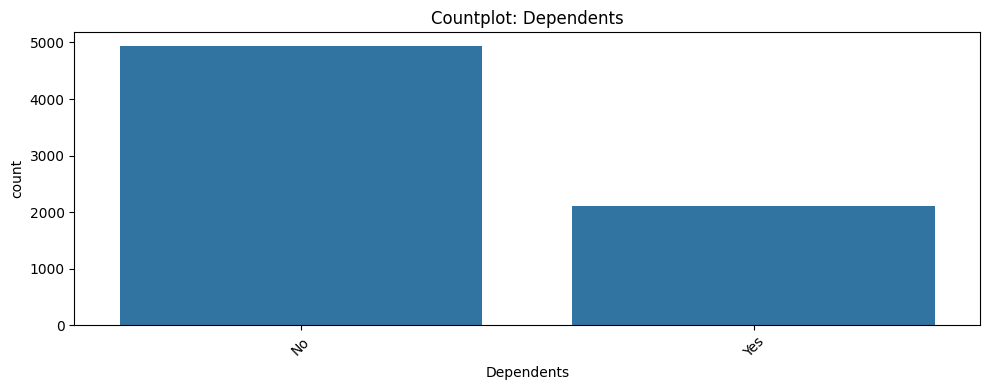

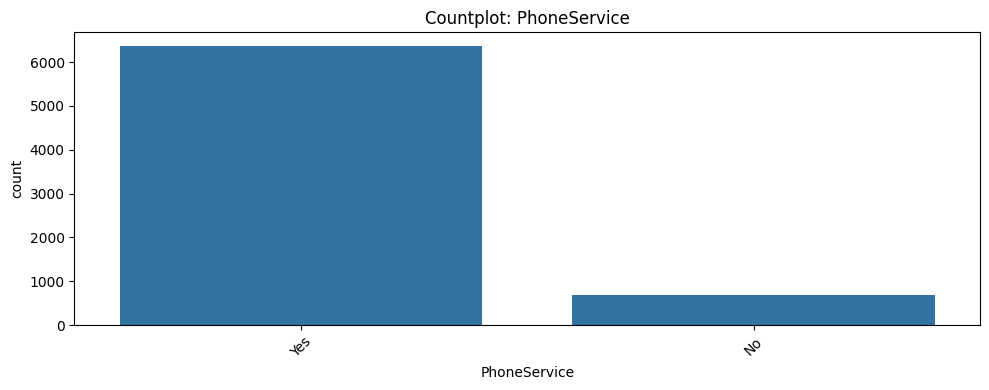

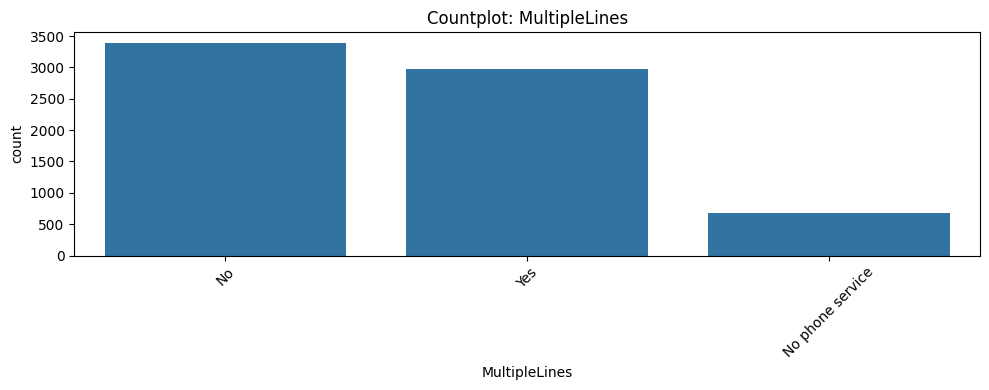

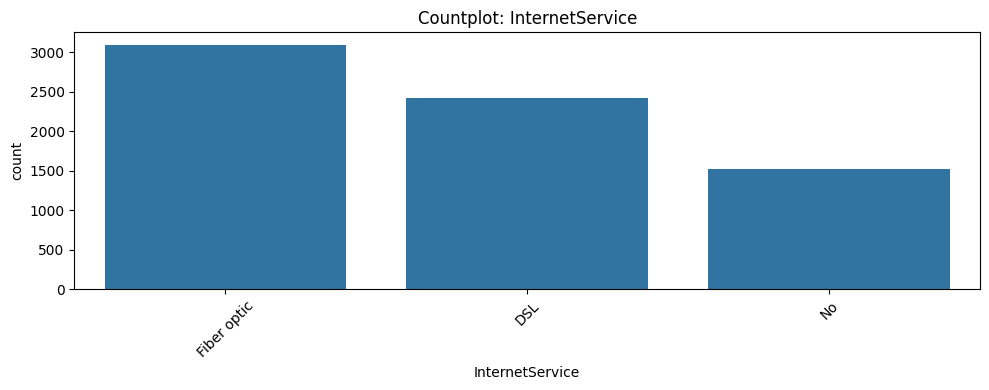

In [12]:
for c in cat_cols[:6]:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=c, order=df[c].value_counts().index)
    plt.title(f"Countplot: {c}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Numeric Distributions

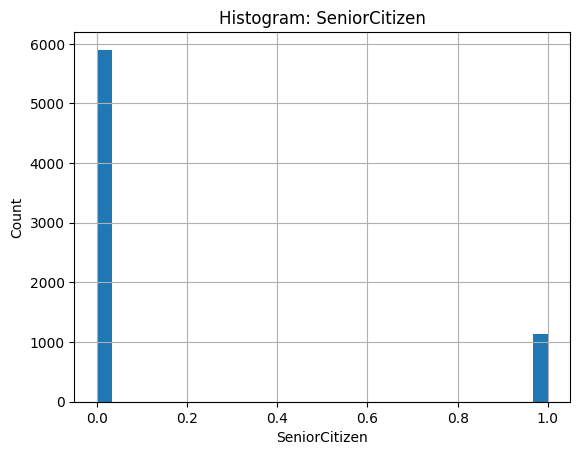

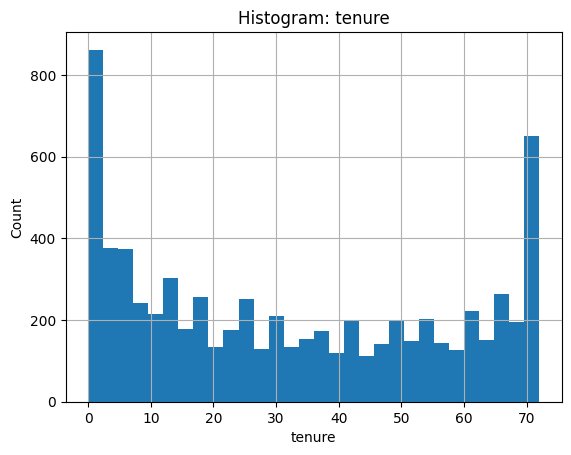

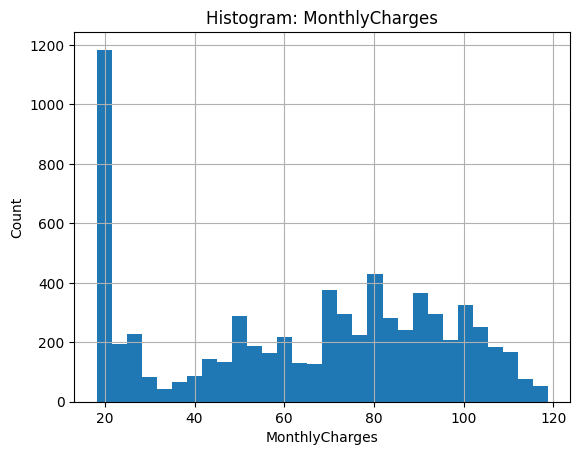

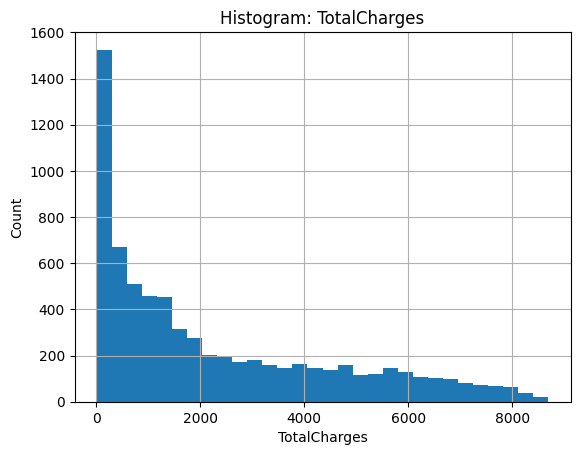

In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for c in num_cols:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

Boxplots By Churn

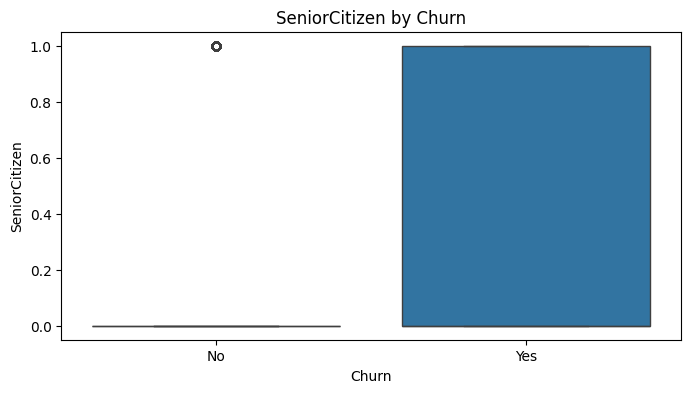

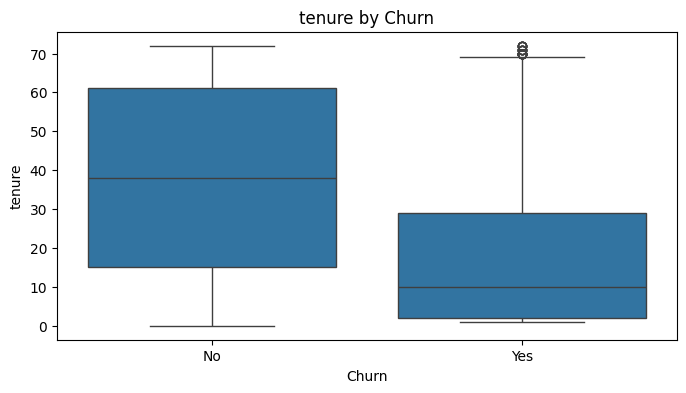

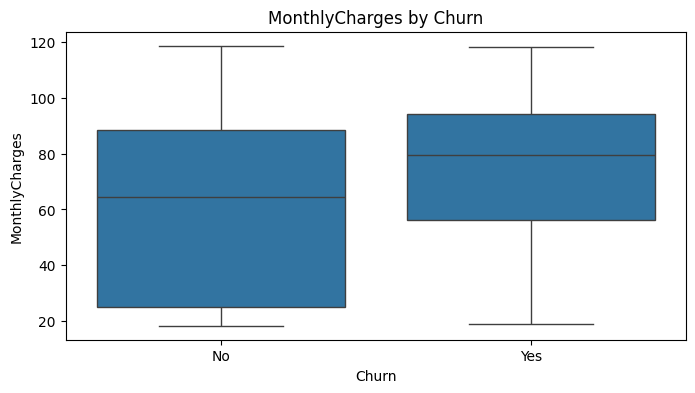

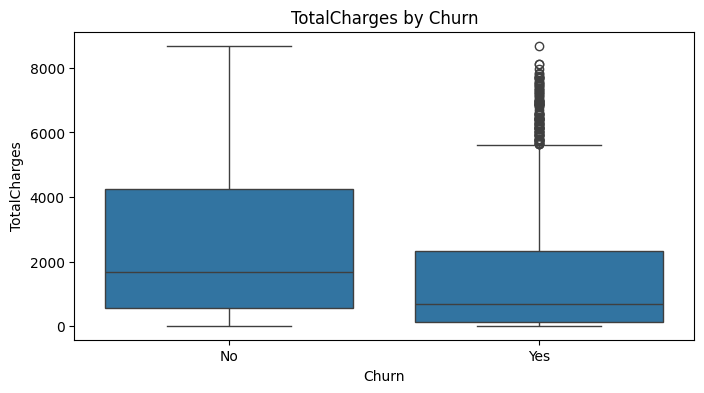

In [14]:
if "Churn" in df.columns:
    for c in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x="Churn", y=c, data=df)
        plt.title(f"{c} by Churn")
        plt.show()

Correlation Heatmap

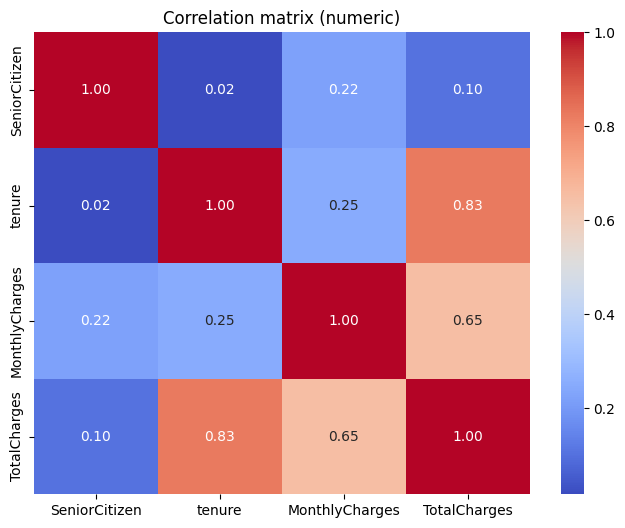

In [15]:
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation matrix (numeric)")
    plt.show()

## 3. Data Preprocessing

Preparation of the dataset for modelling:
- Identify categorical and numeric features.
- Impute missing values (median for numeric, mode for categorical).
- One-Hot encode categorical variables and scale numeric features using a `ColumnTransformer`.
- Split the data into training and testing sets with an 80/20 ratio, stratified on the target to preserve class balance.

We will implement a `Pipeline` so transformations and modelling are reproducible.

Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Dropping ID Column if exists

**The reason is:** customerID is only an identification number. It does not give useful information for analysis or prediction.

In short, we drop it to make the data cleaner and more useful.

In [17]:
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

Checking whether the `Churn` column is binary categorical or not

In [25]:
unique_vals = df["Churn"].dropna().unique()
if len(unique_vals) != 2:
    raise ValueError(f"Target column must be binary categorical. Found values: {unique_vals}")

No error, then it is binary categorical.

![](https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2019/01/07/Pictures/2019-golden-globes-show-beverly-hills-california_24b31aec-123d-11e9-910e-2eacbc0579ab.jpg)

Feature Lists

In [26]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Churn" in num_cols:
    num_cols.remove("Churn")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

Numeric features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Simple Imputers (**Imputer** - a tool or technique used to handle missing data in datasets, particularly `NaN` or `None`)

We'll use two: *numeric* and *categorical*

In [27]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

Preprocessing Transformers (`ColumnTransformer`, `CategoricalPipeline`, `NumericPipeline`)

In [29]:
numeric_transformer = Pipeline(steps=[
    ('imputer', num_imputer),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', cat_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

Splitting into **training** and **testing** sets

In [47]:
X = df.drop(columns=["Churn"])
y = df["Churn"].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Example pipeline with preprocessing only
from sklearn.ensemble import RandomForestClassifier
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

Training shape: (5634, 19)
Test shape: (1409, 19)


In the 2nd row, I encountered an error: `ValueError: invalid literal for int() with base 10: 'No'`

It means that:
Yes, our `Churn` column is a categorical variable, but it **was not** like 1 and 0, it was **Yes and No**.

That is why I have replaced `Yes` with 1 and `No` with 0.

## 4. Baseline Model

Construct a baseline model using `RandomForestClassifier` in a pipeline. Fit to the training data and evaluate on the test set with several metrics: Accuracy, Precision, Recall, F1-score, and ROC-AUC. The baseline provides a reference for later tuning and model selection.

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

Fitting baseline

In [45]:
# normalise column names: strip and remove BOM-like chars
df.columns = df.columns.str.replace("\ufeff", "", regex=False).str.strip()
# optional: make consistent case (only if you want to):
# df.columns = df.columns.str.lower()

print("After normalisation. Does 'Churn' exist?:", "Churn" in df.columns)

After normalisation. Does 'Churn' exist?: True


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

baseline_pipeline.fit(X_train, y_train)

,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediction and Evaluation

In [56]:
y_pred = baseline_pipeline.predict(X_test)
y_proba = baseline_pipeline.predict_proba(X_test)[:, 1]

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, pos_label="Yes"),
    "recall": recall_score(y_test, y_pred, pos_label="Yes"),
    "f1": f1_score(y_test, y_pred, pos_label="Yes"),
    "roc_auc": roc_auc_score(y_test, y_proba)
}

print("Baseline metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Baseline metrics:
accuracy: 0.7779
precision: 0.6034
recall: 0.4759
f1: 0.5321
roc_auc: 0.8162

Classification report:
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1035
         Yes       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



Comparison Baseline

In [57]:
baseline_results = metrics.copy()

## 5. Model Tuning (Bayesian Optimisation)

Installing SK-optimize, for BayesSearchCv

In [59]:
pip install scikit-optimize


   ---------------------------------------- 0/2 [pyaml]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   ---------------------------------------- 2/2 [scikit-optimize]

Note: you may need to restart the kernel to use updated packages.


In [62]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

In [63]:
from sklearn.model_selection import StratifiedKFold

Search space for Random Forest

Search space - the **set of all possible solutions, configurations, or parameters** that an algorithm can explore to find the optimal solution for a given problem

In [64]:
search_spaces = {
    'clf__n_estimators': Integer(100, 1000),
    'clf__max_depth': Integer(3, 50),
    'clf__min_samples_split': Integer(2, 20),
    'clf__max_features': Categorical(['sqrt', 'log2', None])
}

Pipeline

In [66]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

bayes_search = BayesSearchCV(
    rf_pipeline,
    search_spaces,
    n_iter=30,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

BayesSearchCV

In [67]:
print("Starting BayesSearchCV...")
bayes_search.fit(X_train, y_train)

print("Best parameters found:")
print(bayes_search.best_params_)
print("Best CV ROC-AUC:", bayes_search.best_score_)

Starting BayesSearchCV...
Best parameters found:
OrderedDict([('clf__max_depth', 22), ('clf__max_features', 'sqrt'), ('clf__min_samples_split', 20), ('clf__n_estimators', 974)])
Best CV ROC-AUC: 0.8443245691239222


Evaluating best model

In [71]:
best_rf = bayes_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

tuned_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_best),
    "precision": precision_score(y_test, y_pred_best, pos_label="Yes"),
    "recall": recall_score(y_test, y_pred_best, pos_label="Yes"),
    "f1": f1_score(y_test, y_pred_best, pos_label="Yes"),
    "roc_auc": roc_auc_score(y_test, y_proba_best)
}
print("\nTuned RF metrics on test set:")
for key, value in tuned_metrics.items():
    print(f"{key}: {value:.4f}")


Tuned RF metrics on test set:
accuracy: 0.8055
precision: 0.6799
recall: 0.5053
f1: 0.5798
roc_auc: 0.8416


## Additional Models and Comparison

Train 2 alternative gradient-boosting models and compare them:
- XGBoost (`XGBClassifier`)
- CatBoost (`CatBoostClassifier`)


In [74]:
results = []

Evaluation model function

In [75]:
def eval_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:,1]
    except:
        
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    result = {
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    }
    return result

Label Encoding (I know it is too late but whatever)

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# resplitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

**Why did we do that?**

We have already faced the error about not encoding our target variable, from *1* and *0* to **Yes** and **No**

XGBoost

In [79]:
try:
    from xgboost import XGBClassifier
    xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1))])
    results.append(eval_model(xgb_pipe, "XGBoost (default)"))
except Exception as e:
    print("XGBoost not available:", e)

c:\Users\Huawei\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:29:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost

In [81]:
pip install catboost


   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.5 MB 6.3 MB/s eta 0:00:17
   - -------------------------------------- 2.6/102.5 MB 6.0 MB/s eta 0:00:17
   - -------------------------------------- 5.0/102.5 MB 8.0 MB/s eta 0:00:13
   --- ------------------------------------ 8.1/102.5 MB 9.7 MB/s eta 0:00:10
   ---- ----------------------------------- 11.0/102.5 MB 10.7 MB/s eta 0:00:09
   ----- ---------------------------------- 14.2/102.5 MB 11.5 MB/s eta 0:00:08
   ------ --------------------------------- 17.3/102.5 MB 12.1 MB/s eta 0:00:08
   ------- -------------------------------- 20.4/102.5 MB 12.5 MB/s eta 0:00:07
   --------- ------------------------------ 23.6/102.5 MB 12.9 MB/s eta 0:00:07
   ---------- ----------------------------- 27.0/102.5 MB 13.3 MB/s eta 0:00:06
   ----------- ---------------------------- 30.4/102.5 MB 13.6 MB

In [82]:
try:
    from catboost import CatBoostClassifier
    cat_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', CatBoostClassifier(verbose=0, random_state=42))])
    results.append(eval_model(cat_pipe, "CatBoost (default)"))
except Exception as e:
    print("CatBoost not available:", e)

Adding tuned Random Forest result to compare

In [83]:
results.append({"model": "RF (tuned)", **tuned_metrics})
results.append({"model": "RF (baseline)", **baseline_results})

Showing result table

In [84]:
results_df = pd.DataFrame(results).set_index("model")
display(results_df.sort_values(by="roc_auc", ascending=False).round(4))

,accuracy,precision,recall,f1,roc_auc
model,,,,,
RF (tuned),0.8055,0.6799,0.5053,0.5798,0.8416
CatBoost (default),0.7928,0.6331,0.5214,0.5718,0.8377
XGBoost (default),0.7850,0.6060,0.5428,0.5726,0.8254
RF (baseline),0.7779,0.6034,0.4759,0.5321,0.8162


## 7. Saving the Best Model

We select the best model programmatically according to the ROC-AUC on the test set. The pipeline includes preprocessing, so the saved object can be loaded and used directly for prediction on raw input data.


We need to import `joblib`

In [85]:
import joblib

Choosing the best model from `results_df` by `roc_auc`

In [86]:

if 'roc_auc' in results_df.columns:
    best_name = results_df['roc_auc'].idxmax()
    print("Best model by test ROC-AUC:", best_name)
else:
    best_name = "RF (tuned)"

Best model by test ROC-AUC: RF (tuned)


**Map model name to object**

In [87]:
model_map = {
    "RF (tuned)": best_rf,
    "RF (baseline)": baseline_pipeline,
    "XGBoost (default)": xgb_pipe if 'xgb_pipe' in globals() else None,
    "CatBoost (default)": cat_pipe if 'cat_pipe' in globals() else None
}

final_model = model_map.get(best_name, best_rf)
if final_model is None:
    final_model = best_rf

joblib.dump(final_model, "best_model_final.pkl")

['best_model_final.pkl']

# **8. Final Report & Presentation**

In [88]:
from sklearn.metrics import roc_curve, auc

ROC curve for final model

In [93]:
final_model = joblib.load("best_model_final.pkl")

In [95]:
y_proba_final = final_model.predict_proba(X_test)[:,1]

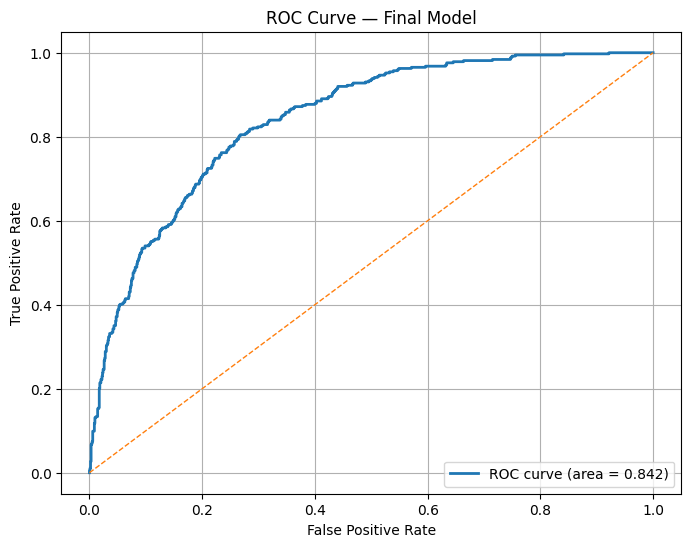

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_val:.3f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Final Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Function to extract feature names from `ColumnTransformer`

In [97]:
def get_feature_names_from_columntransformer(column_transformer):
    feature_names = []
    
    for name, transformer, cols in column_transformer.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if hasattr(transformer, 'named_steps') and 'onehot' in transformer.named_steps:
            
            ohe = transformer.named_steps['onehot']
            imputed_cols = cols
            try:
                ohe_feature_names = ohe.get_feature_names_out(imputed_cols)
            except:
                
                ohe_feature_names = [f"{c}_{i}" for c in imputed_cols for i in range(1)]
            feature_names.extend(list(ohe_feature_names))
        elif isinstance(transformer, OneHotEncoder):
            try:
                feature_names.extend(transformer.get_feature_names_out(cols))
            except:
                feature_names.extend([f"{c}_{i}" for c in cols for i in range(1)])
        else:
            
            if hasattr(cols, '__iter__'):
                feature_names.extend(list(cols))
            else:
                feature_names.append(cols)
    return feature_names

If the final_model is a pipeline with `preprocessor` followed by clf:

In [102]:
if isinstance(final_model, Pipeline) and 'preprocessor' in final_model.named_steps:
    ct = final_model.named_steps['preprocessor']
    feat_names = get_feature_names_from_columntransformer(ct)
    
    try:
        clf = final_model.named_steps[[k for k in final_model.named_steps if k!='preprocessor'][-1]]
        
        importances = clf.feature_importances_
    except Exception:
        
        try:
            importances = final_model.feature_importances_
        except:
            importances = None
else:
    feat_names = num_cols + cat_cols
    try:
        importances = final_model.feature_importances_
    except:
        importances = None

In [103]:
if importances is not None and len(feat_names) == len(importances):
    fi = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(20)
    plt.figure(figsize=(10,6))
    fi.plot(kind='bar')
    plt.title('Top 20 Feature Importances')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available.")

Feature importances not available.


Hmm, we don't have feature importances for the final model.

In [105]:
print("\nSummary:")
print(f"- Selected model: {best_name}")
if 'bayes_search' in globals():
    print(f"- Tuned RF best CV ROC-AUC: {bayes_search.best_score_:.4f}")
    print(f"- Tuned RF best parameters: {bayes_search.best_params_}")


Summary:
- Selected model: RF (tuned)
- Tuned RF best CV ROC-AUC: 0.8443
- Tuned RF best parameters: OrderedDict([('clf__max_depth', 22), ('clf__max_features', 'sqrt'), ('clf__min_samples_split', 20), ('clf__n_estimators', 974)])


**Summary Explanation**

* **Selected model: RF (tuned)**
  - This means the model we chose is a **Random Forest** (RF), a type of machine learning model that uses many decision trees together to make predictions. “Tuned” means we **changed its settings** to get the best performance.

* **Tuned RF best CV ROC-AUC: 0.8443**
  - CV stands for **Cross-Validation**, a way to test the model many times to see how well it works. ROC-AUC is a number that shows how good the model is at **telling between two classes** (for example, yes/no, buy/not buy). A score of **0.8443** is very good.

* **Tuned RF best parameters:**
  These are the **settings** we found that made the Random Forest work best:

  * `clf__max_depth = 22` - each tree in the forest can go **22 levels deep**.

  * `clf__max_features = 'sqrt'` - Each tree uses the **square root of total features** when deciding on splits. This helps trees be different from each other.

  * `clf__min_samples_split = 20` - A node must have **at least 20 samples** before it can split. This prevents very small splits that might be just noise.

  * `clf__n_estimators = 974` - The forest has **974 trees**. More trees usually make predictions better, but take more time to run.

### Thank you very much!

![](https://i.pinimg.com/736x/5b/4d/8b/5b4d8bd1a878ca164b531c98acd1eb6f.jpg)